# ЛИНЕЙНАЯ АЛГЕБРА

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [6]:
arr=np.array([[1,2],[3,4]])
linalg.det(arr)

-2.0

In [8]:
arr=np.array([[3,2],[6,4]])


In [11]:
linalg.det(arr)

0.0

In [12]:
arr=np.array([[1,2],[3,4]])

In [13]:
iarr=linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# ИНТЕРПОЛЯЦИЯ

In [33]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
x=np.linspace(0,4,12) #интервал 12 точек от 0 до 4
y=np.cos(x**2/3+4)
print(x,y)

[0.         0.36363636 0.72727273 1.09090909 1.45454545 1.81818182
 2.18181818 2.54545455 2.90909091 3.27272727 3.63636364 4.        ] [-0.65364362 -0.61966189 -0.51077021 -0.31047698 -0.00715476  0.37976236
  0.76715099  0.99239518  0.85886263  0.27994201 -0.52586509 -0.99582185]


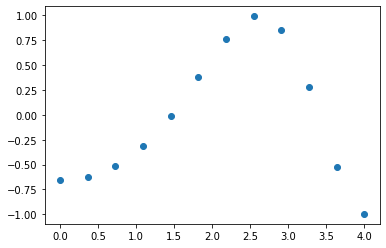

In [34]:
plt.plot(x,y,"o")

In [35]:
from scipy.interpolate import interp1d
f1=interp1d(x,y,kind='linear') #вход х у;kind функция 
f2=interp1d(x,y,kind='cubic')

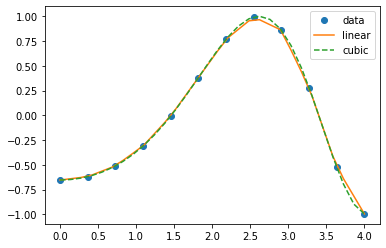

In [36]:
xnew=np.linspace(0,4,30)
plt.plot(x,y,"o",xnew,f1(xnew),"-",xnew,f2(xnew),"--")
plt.legend(["data","linear","cubic","nearest"],loc="best")
plt.show()

# СПЛАЙНЫ

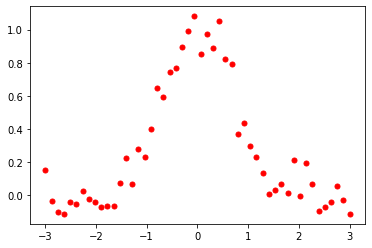

In [37]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x=np.linspace(-3,3,50)
y=np.exp(-x**2)+0.1*np.random.randn(50)
plt.plot(x,y,'ro',ms=5)
plt.show()

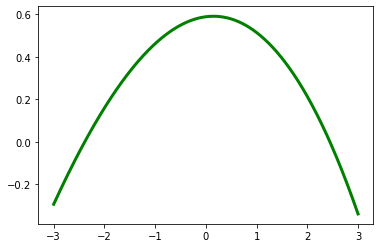

In [38]:
spl=UnivariateSpline(x,y)
xs=np.linspace(-3,3,1000)
plt.plot(xs,spl(xs),'g',lw=3)
plt.show()

# ОПТИМИЗАЦИЯ И ПОДГОНКА

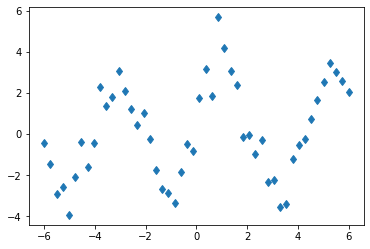

In [28]:
from scipy import optimize
x_data=np.linspace(-6,6,num=50)
y_data=2.9*np.sin(1.5*x_data)+np.random.normal(size=50)
plt.plot(x_data,y_data,'d',lw=3)

In [30]:
def  test_func(x,a,b):
  return a*np.sin(b*x)
  


In [31]:
params,params_covariance=optimize.curve_fit(test_func,x_data,y_data,p0=[2,2])
print(params)

[3.10481861 1.52007639]


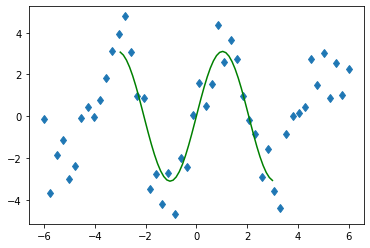

In [32]:
a=params[0]
b=params[1]
y1=test_func(x,a,b)
plt.plot(x_data,y_data,'d',x,y1,'g')
plt.show()

# ЗАДАНИЕ 1

Text(0, 0.5, 'Min i Max t')

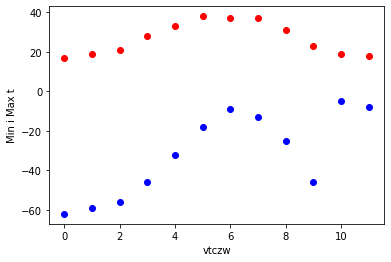

In [41]:
import numpy as np
temp_max=np.array([17,19,21,28,33,38,37,37,31,23,19,18])
temp_min=np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-5,-8])
import matplotlib.pyplot as plt
months=np.arange(12)
plt.plot(months,temp_max,'ro')
plt.plot(months,temp_min,'bo')
plt.xlabel('vtczw')
plt.ylabel('Min i Max t')


In [53]:
from scipy import optimize
def yearly_temps(times, avg, amp1, time_offset):
 return (avg+amp1*np.cos((times+time_offset)*2*np.pi/times.max()))

res_max, cov_max=optimize.curve_fit(yearly_temps, months, temp_max, [20,10,0])
res_min, cov_min=optimize.curve_fit(yearly_temps, months, temp_min, [-40,20,0])


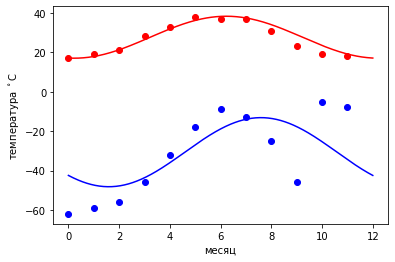

In [54]:
days=np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months,temp_max,'ro')
plt.plot(days,yearly_temps(days,*res_max),'r-')
plt.plot(months,temp_min,'bo')
plt.plot(days,yearly_temps(days,*res_min),'b-')
plt.xlabel('месяц')
plt.ylabel('температура $^\circ$C')
plt.show()
